# Regressão Álcool

In [1]:
import numpy
import pandas
import itertools
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import seaborn
import statsmodels.api as sm

In [2]:
# PARÂMETROS
random_seed = 42

# FOLDING
n_k_folds = 5

# ATTRIBUTES SELECTION
y_col = 'alcohol'
x_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

In [3]:
raw_data = pandas.read_csv('winequality-red.csv')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data = raw_data.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### PairPlot

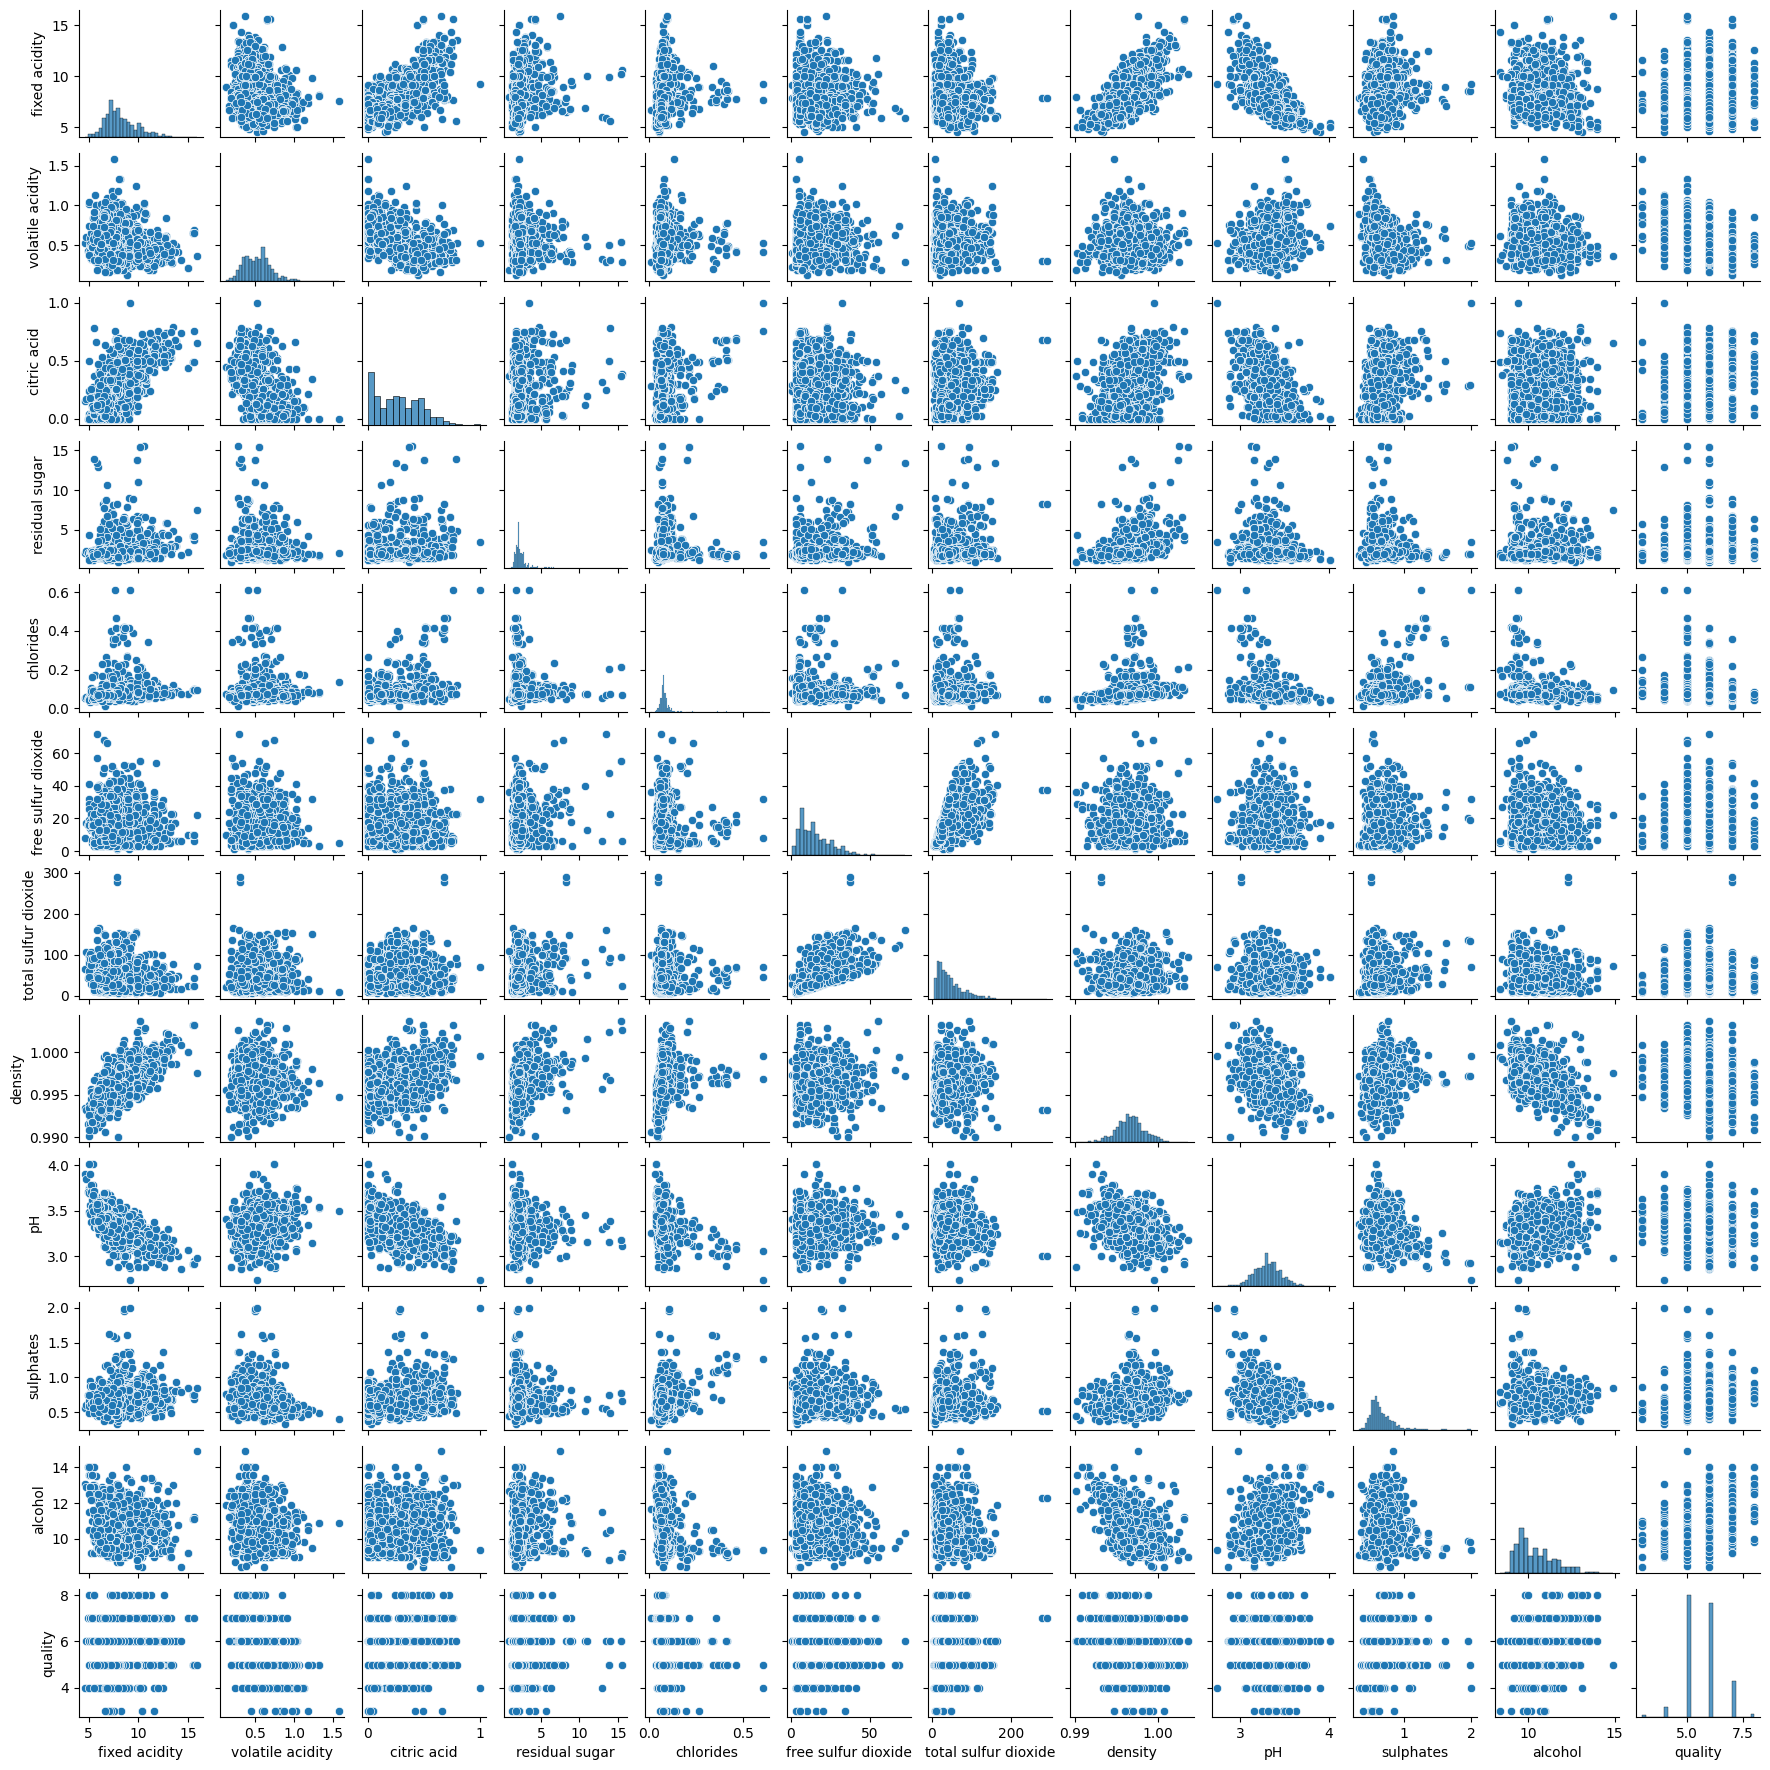

In [7]:
_ = seaborn.pairplot(data, height=1.5)

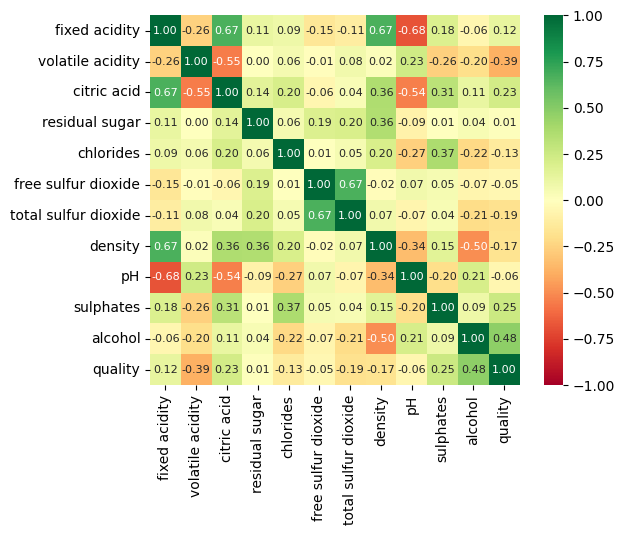

In [8]:
corr_matx = data.corr()
heatmap = seaborn.heatmap(corr_matx,
                          cbar=True,
                          annot=True,
                          square=True,
                          fmt='.2f',
                          annot_kws={'size': 8},
                          cmap='RdYlGn',
                          vmin=-1,
                          vmax=1)

In [9]:
data['y'] = data[y_col]
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,9.4


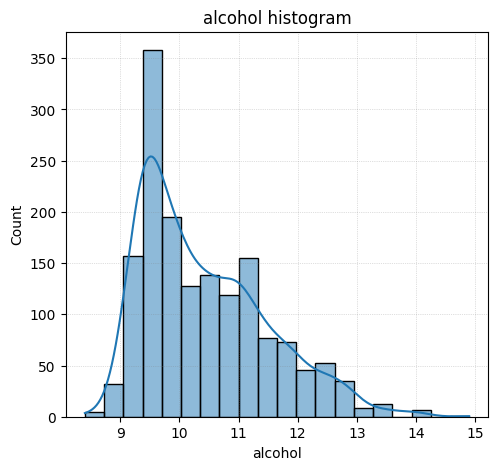

In [10]:
fig = pyplot.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
_ = seaborn.histplot(data=data, x=y_col, ax=ax1, kde=True, bins=20)
_ = ax1.set_title(f"{y_col} histogram")
_ = ax1.grid(which='both', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)

## TREINO MODELO

In [11]:
# SET THE RANDOM SEED
numpy.random.seed(random_seed)
kf = KFold(n_splits=n_k_folds, shuffle=True, random_state=random_seed)

result_list = []
for i in range(1, len(x_cols) + 1):
    for combo in itertools.combinations(x_cols, i):
        features = list(combo)
        fold_ix = 0
        for train_index, test_index in kf.split(data[features], data['y']):
            X_train, X_test = data[features].iloc[train_index].to_numpy(), data[features].iloc[test_index].to_numpy()
            y_train, y_test = data['y'].iloc[train_index].to_numpy(), data['y'].iloc[test_index].to_numpy()

            # STANDARD SCALER
            scaler = StandardScaler().fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # ADD CONSTANT
            X_train_scaled = sm.add_constant(X_train_scaled)
            X_test_scaled = sm.add_constant(X_test_scaled)

            # TRAIN OLS
            model = sm.OLS(y_train, X_train_scaled).fit()
            adj_r_squared = model.rsquared_adj

            if all(pvalue < 0.05 for pvalue in model.pvalues):
                # TEST OLS
                y_pred_train = model.predict(X_train_scaled)
                y_pred_test = model.predict(X_test_scaled)

                mse_train = mean_squared_error(y_train, y_pred_train)
                mse_test = mean_squared_error(y_test, y_pred_test)

                result_list.append({'features' : features, 'adj_r_squared': adj_r_squared, 'mse_train': mse_train,  'mse_test' : mse_test, 'model' : model})
                print(f'Fold {fold_ix:02d} - OLS -  adj_R2: {adj_r_squared:.2f} - MSE_train: {mse_train:.2f} - MSE_test: {mse_test:.2f} - features: {features}')
            fold_ix += 1


Fold 00 - OLS -  adj_R2: 0.00 - MSE_train: 1.10 - MSE_test: 1.24 - features: ['fixed acidity']
Fold 03 - OLS -  adj_R2: 0.01 - MSE_train: 1.12 - MSE_test: 1.18 - features: ['fixed acidity']
Fold 04 - OLS -  adj_R2: 0.01 - MSE_train: 1.13 - MSE_test: 1.13 - features: ['fixed acidity']
Fold 00 - OLS -  adj_R2: 0.04 - MSE_train: 1.06 - MSE_test: 1.21 - features: ['volatile acidity']
Fold 01 - OLS -  adj_R2: 0.05 - MSE_train: 1.11 - MSE_test: 0.99 - features: ['volatile acidity']
Fold 02 - OLS -  adj_R2: 0.04 - MSE_train: 1.09 - MSE_test: 1.10 - features: ['volatile acidity']
Fold 03 - OLS -  adj_R2: 0.04 - MSE_train: 1.09 - MSE_test: 1.10 - features: ['volatile acidity']
Fold 04 - OLS -  adj_R2: 0.04 - MSE_train: 1.10 - MSE_test: 1.06 - features: ['volatile acidity']
Fold 00 - OLS -  adj_R2: 0.01 - MSE_train: 1.09 - MSE_test: 1.23 - features: ['citric acid']
Fold 01 - OLS -  adj_R2: 0.02 - MSE_train: 1.15 - MSE_test: 1.02 - features: ['citric acid']
Fold 02 - OLS -  adj_R2: 0.01 - MSE_tra

In [12]:
df_results = pandas.DataFrame(result_list).sort_values('mse_test')
df_results

,features,adj_r_squared,mse_train,mse_test,model
2939,"[fixed acidity, volatile acidity, citric acid,...",0.672055,0.380511,0.360932,<statsmodels.regression.linear_model.Regressio...
2751,"[fixed acidity, citric acid, residual sugar, t...",0.651214,0.384095,0.363744,<statsmodels.regression.linear_model.Regressio...
2329,"[fixed acidity, citric acid, residual sugar, d...",0.645626,0.390555,0.364231,<statsmodels.regression.linear_model.Regressio...
2938,"[fixed acidity, volatile acidity, citric acid,...",0.656291,0.377908,0.365223,<statsmodels.regression.linear_model.Regressio...
2883,"[fixed acidity, volatile acidity, citric acid,...",0.648814,0.386434,0.365252,<statsmodels.regression.linear_model.Regressio...
...,...,...,...,...,...
577,"[residual sugar, free sulfur dioxide, sulphates]",0.018644,1.084103,1.240564,<statsmodels.regression.linear_model.Regressio...
56,"[fixed acidity, free sulfur dioxide]",0.010776,1.093652,1.243578,<statsmodels.regression.linear_model.Regressio...
191,"[free sulfur dioxide, sulphates]",0.016129,1.087734,1.244216,<statsmodels.regression.linear_model.Regressio...
134,"[residual sugar, free sulfur dioxide]",0.008749,1.095894,1.247103,<statsmodels.regression.linear_model.Regressio...


In [13]:
best_model = min(result_list, key=lambda x: x['mse_test'])
best_model

{'features': ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates'],
 'adj_r_squared': 0.6720554415624348,
 'mse_train': 0.38051147361625487,
 'mse_test': 0.360932306129426,
 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7152008eea80>}

In [14]:
print(f"Best model features: {best_model['features']}")

Best model features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


In [15]:
results = best_model['model']
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     292.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          9.52e-302
Time:                        14:21:12   Log-Likelihood:                -1196.9
No. Observations:                1279   AIC:                             2414.
Df Residuals:                    1269   BIC:                             2465.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4393      0.017    602.864      0.0

In [16]:
params = pandas.Series(results.params)
bse = pandas.Series(results.bse)
features = best_model['features']

df_results = pandas.concat([params, bse], axis=1)
df_results = df_results.set_index(pandas.Index(['Intercept'] + features))
df_results.columns = ["alpha", "sigma"]
df_results = df_results.sort_values("alpha", ascending=False)
df_results

,alpha,sigma
Intercept,10.439328,0.017316
fixed acidity,0.968718,0.039027
pH,0.582452,0.026570
residual sugar,0.413905,0.019394
sulphates,0.210331,0.019686
citric acid,0.143777,0.029372
volatile acidity,0.052706,0.022936
chlorides,-0.041650,0.020701
total sulfur dioxide,-0.093172,0.018900
density,-1.189933,0.027862


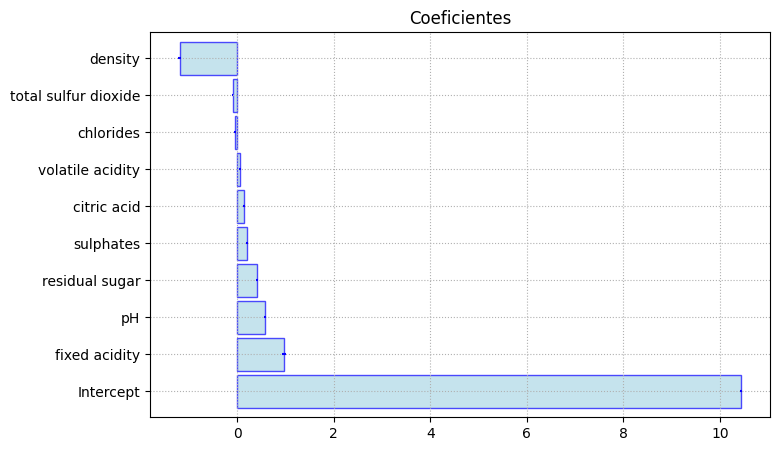

In [17]:
fig = pyplot.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
_ = df_results.alpha.plot.barh(width=0.9, ax=ax, color="lightblue", alpha=0.7, edgecolor="#0800ff")
_ = ax.errorbar(y=df_results.index.values, x=df_results.alpha.values,  xerr=df_results.sigma.values, ls='', color="#0800ff")
_ = ax.grid(ls=':')
_ = ax.set_title('Coeficientes')

## RE-TREINO MELHOR MODELO

In [18]:
new_features = list(df_results[abs(df_results['alpha']) > 0.2].index)
new_features = new_features[1:] # Remove Intercept
new_features

['fixed acidity', 'pH', 'residual sugar', 'sulphates', 'density']

In [19]:
y = data['alcohol']
X = data[new_features]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     610.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:21:12   Log-Likelihood:                -1514.4
No. Observations:                1599   AIC:                             3041.
Df Residuals:                    1593   BIC:                             3073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4230      0.016    666.819      0.0

In [21]:
analysis = X.join(y)
analysis['y_est'] = results.predict()
analysis['residual'] = analysis['y_est'] - analysis['alcohol']
analysis['rn'] = (analysis['residual']-analysis['residual'].mean())/analysis['residual'].std()
analysis['rabs'] = analysis['residual'].abs()
analysis.head()

,fixed acidity,pH,residual sugar,sulphates,density,alcohol,y_est,residual,rn,rabs
0,7.4,3.51,1.9,0.56,0.9978,9.4,9.668733,0.268733,0.430619,0.268733
1,7.8,3.20,2.6,0.68,0.9968,9.8,9.660877,-0.139123,-0.222931,0.139123
2,7.8,3.26,2.3,0.65,0.9970,9.8,9.651382,-0.148618,-0.238147,0.148618
3,11.2,3.16,1.9,0.58,0.9980,9.8,10.531177,0.731177,1.171640,0.731177
4,7.4,3.51,1.9,0.56,0.9978,9.4,9.668733,0.268733,0.430619,0.268733


In [22]:
print(f" mean {analysis.residual.mean():.2f}, error 68% {analysis.residual.std():.2f}, error 95% {2*analysis.residual.std():.2f}, error 99% {3*analysis.residual.std():.2f}")

 mean 0.00, error 68% 0.62, error 95% 1.25, error 99% 1.87


In [23]:
params = pandas.Series(results.params)
bse = pandas.Series(results.bse)
features = new_features

df_results = pandas.concat([params, bse], axis=1)
df_results = df_results.set_index(pandas.Index(['Intercept'] + features))
df_results.columns = ["alpha", "sigma"]
df_results = df_results.sort_values("alpha", ascending=False)
df_results

,alpha,sigma
Intercept,10.422983,0.015631
fixed acidity,1.087499,0.028203
pH,0.620249,0.022142
residual sugar,0.404278,0.017087
sulphates,0.201109,0.016021
density,-1.216658,0.023371


In [24]:
eps = 0.1

if 'Intercept' in df_results.index:
    formula = f"{y_col} ~ " +''.join([f"{'+' if numpy.sign(alpha)> 0 else ' -'}{numpy.abs(alpha):.3f}*{var}" for var, (alpha, sigma) in df_results.iterrows() if var != 'Intercept']) + f" {'+' if numpy.sign(df_results.loc['Intercept', 'alpha'])> 0 else ' -'} {numpy.abs(df_results.loc['Intercept', 'alpha']):.3f}"
else:
    formula = f"{y_col} ~ " +''.join([f"{'+' if numpy.sign(alpha)> 0 else ' -'}{numpy.abs(alpha):.3f}*{var}" for var, (alpha, sigma) in df_results.iterrows()])

print(f"{formula} \u00B1 {analysis.residual.std():.3f}")

alcohol ~ +1.087*fixed acidity+0.620*pH+0.404*residual sugar+0.201*sulphates -1.217*density + 10.423 ± 0.624


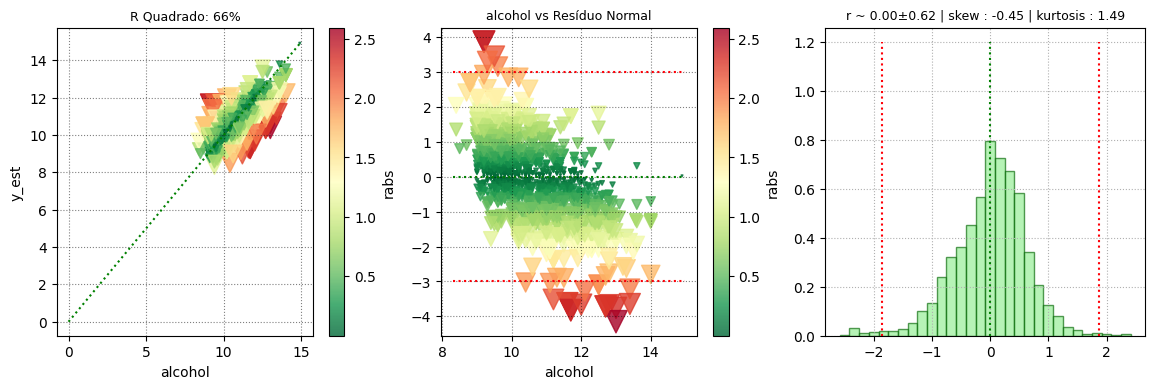

In [25]:
fig = pyplot.figure(figsize=(19, 4))

# ax = fig.add_subplot(141)
# _ = seaborn.scatterplot(y=y_col, x=x_col, palette="Blues", data=analysis, ax=ax, legend=False, markers='o')
# _ = seaborn.scatterplot(y='y_est', x=x_col, data=analysis, ax=ax, marker='x', color='red', legend=False)
# ax.set_title(formula, size=9)
# ax.grid(alpha=0.33, ls=':')

ax2 = fig.add_subplot(142)
_ = analysis.plot.scatter(x=y_col, y='y_est', c="rabs", s=100.0*analysis.rabs, cmap="RdYlGn_r", ax=ax2, marker='v', alpha=0.8)
_ = ax2.grid(ls=':', color="black", alpha=0.5)
_ = ax2.plot([0.0, analysis[y_col].max() + eps], [0.0, analysis[y_col].max() + eps], color="green", ls=":")
_ = ax2.set_title(f"R Quadrado: {100.0*results.rsquared:.0f}%", size=9)

ax1 = fig.add_subplot(143)
_ = analysis.plot.scatter(x=y_col, y="rn", c="rabs", s=100.0*analysis.rabs, cmap="RdYlGn_r", ax=ax1, marker='v', alpha=0.8)
_ = ax1.grid(ls=':', color="black", alpha=0.5)
_ = ax1.set_ylabel("")
_ = ax1.set_xlabel(y_col)
_ = ax1.set_yticks(numpy.arange(-6, 7, 1))
_ = ax1.set_title(f"{y_col} vs Resíduo Normal", size=9)
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [0.0, 0.0], color="green", ls=":")
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [3.0, 3.0], color="#ff0008", ls=":")
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [-3.0, -3.0], color="#ff0008", ls=":")


ax = fig.add_subplot(144)
_ = ax.hist(analysis.residual, bins=30, color='lightgreen', edgecolor='darkgreen', alpha=0.65, density=True)
_ = ax.grid(ls=':')
_ = ax.plot([0.0, 0.0], [0.0, 1.2], color="green", ls=":")
_ = ax.plot([3.0*analysis.residual.std(), 3.0*analysis.residual.std()], [0.0, 1.2], color="#ff0008", ls=":")
_ = ax.plot([-3.0*analysis.residual.std(), -3.0*analysis.residual.std()], [0.0, 1.2], color="#ff0008", ls=":")
_ = ax.set_title(f"r ~ {analysis.residual.mean():.2f}\u00b1{analysis.residual.std():.2f} | skew : {analysis.residual.skew():.2f} | kurtosis : {analysis.residual.kurtosis():.2f}", size=9)